# Data Preprocessing

In [88]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [89]:
## Load the Datasets
file1 = "/content/index_1.csv"
file2 = "/content/index_2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print("Shape of index_1.csv:", df1.shape)
print("Shape of index_2.csv:", df2.shape)

Shape of index_1.csv: (3636, 6)
Shape of index_2.csv: (262, 5)


In [90]:
## Merge the Datasets
df = pd.concat([df1, df2], ignore_index=True)
print("Combined dataset shape:", df.shape)

Combined dataset shape: (3898, 6)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB


In [92]:
df.shape

(3898, 6)

In [93]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,3898.0,31.3806,5.06461,15.0,27.92,32.82,35.76,40.0


In [95]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

# Data Cleaning

In [96]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,351
money,0
coffee_name,0


In [97]:
df.nunique()

,0
date,381
datetime,3890
cash_type,2
card,1316
money,27
coffee_name,34


In [98]:
duplicated = df.duplicated()
print(f'Total number of dupliacted value are {len(df[duplicated])}')
print(f'Total number of dupliacted value are {(df[duplicated])}')

df = df.drop_duplicates()
print(f'Total number of dupliacted value are {len(df[duplicated])}')



Total number of dupliacted value are 2
Total number of dupliacted value are             date             datetime cash_type card  money  \
3747  2025-02-26  2025-02-26 09:41:12      cash  NaN   25.0   
3892  2025-03-23  2025-03-23 10:25:48      cash  NaN   25.0   

              coffee_name  
3747  Americano with milk  
3892  Americano with milk  
Total number of dupliacted value are 0


<ipython-input-98-a99d2ce536a5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Total number of dupliacted value are {len(df[duplicated])}')


In [99]:
# Handling missing values
missing_value = df[df['card'].isnull()]
missing_value

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46,cash,NaN,30.0,Cappuccino
3894,2025-03-23,2025-03-23 15:15:36,card,NaN,25.0,Irish whiskey
3895,2025-03-23,2025-03-23 17:59:25,card,NaN,28.0,Super chocolate
3896,2025-03-23,2025-03-23 18:01:33,card,NaN,28.0,Vanilla with Irish whiskey


In [100]:
# Dropping the 'card' column as it is unnecessary, just keep the 'cash_type' will do, AKA payment method
df.drop(columns= ['card'], inplace= True)

<ipython-input-100-4c06e77fecae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ['card'], inplace= True)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3897
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3896 non-null   object 
 1   datetime     3896 non-null   object 
 2   cash_type    3896 non-null   object 
 3   money        3896 non-null   float64
 4   coffee_name  3896 non-null   object 
dtypes: float64(1), object(4)
memory usage: 182.6+ KB


In [102]:
# Convert both column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'], format="mixed")

df[['date','datetime']].info()

<ipython-input-102-bc624c5019e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-102-bc624c5019e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'], format="mixed")


<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3897
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      3896 non-null   datetime64[ns]
 1   datetime  3896 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 91.3 KB


In [103]:
df

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte
...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46.000,cash,30.0,Cappuccino
3894,2025-03-23,2025-03-23 15:15:36.000,card,25.0,Irish whiskey
3895,2025-03-23,2025-03-23 17:59:25.000,card,28.0,Super chocolate
3896,2025-03-23,2025-03-23 18:01:33.000,card,28.0,Vanilla with Irish whiskey


In [104]:
#Create columns for day of week, year, month, day, hour of coffee purchases
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['datetime'].dt.hour

In [105]:
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [106]:
df[['year', 'month', 'day', 'hour']].describe().T

,count,mean,std,min,25%,50%,75%,max
year,3896.0,2024.308778,0.462049,2024.0,2024.0,2024.0,2025.0,2025.0
month,3896.0,6.132957,3.504449,1.0,3.0,6.0,9.0,12.0
day,3896.0,15.524127,8.547079,1.0,8.0,16.0,22.0,31.0
hour,3896.0,14.206622,4.214976,6.0,11.0,14.0,18.0,23.0


In [107]:
df

,date,datetime,cash_type,money,coffee_name,day_of_week,year,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,Friday,2024,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,Friday,2024,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,Friday,2024,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,Friday,2024,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,Friday,2024,3,1,13
...,...,...,...,...,...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46.000,cash,30.0,Cappuccino,Sunday,2025,3,23,14
3894,2025-03-23,2025-03-23 15:15:36.000,card,25.0,Irish whiskey,Sunday,2025,3,23,15
3895,2025-03-23,2025-03-23 17:59:25.000,card,28.0,Super chocolate,Sunday,2025,3,23,17
3896,2025-03-23,2025-03-23 18:01:33.000,card,28.0,Vanilla with Irish whiskey,Sunday,2025,3,23,18


# EDA

In [108]:
len(df['coffee_name'].unique())

34

In [109]:
#avg_spent_coffee = df.groupby('coffee_name')['money'].mean().reset_index().sort_values(by='money', ascending=False)
#avg_spent_coffee.head(10)

#plt.figure(figsize=(10, 6))
#ax = sns.barplot(data=avg_spent_coffee, x='coffee_name', y='money', color = 'skyblue')
#ax.bar_label(ax.containers[0], fontsize=10)
#plt.xlabel('Coffee Name')
#plt.ylabel('Average Money Spent')
#plt.title('Average Money(in $) Spent on Each Coffee Type')
#plt.xticks(rotation=90)


In [110]:
#df['coffee_name'].value_counts().head(10)

In [111]:
cash_type = df['cash_type'].value_counts()

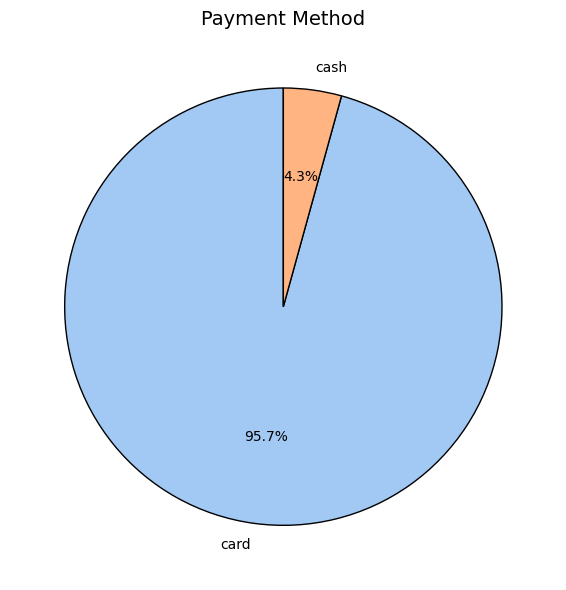

In [112]:
colors = sns.color_palette('pastel')[0:len(cash_type)]

plt.figure(figsize=(6,6))
plt.pie(cash_type.values,
        labels=cash_type.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Payment Method', fontsize=14)
plt.tight_layout()
plt.show()


In [113]:
hourly_sales=df['hour'].value_counts().sort_index()
hourly_sales

,count
hour,
6,5
7,99
8,246
9,257
10,362
11,316
12,271
13,241
14,245


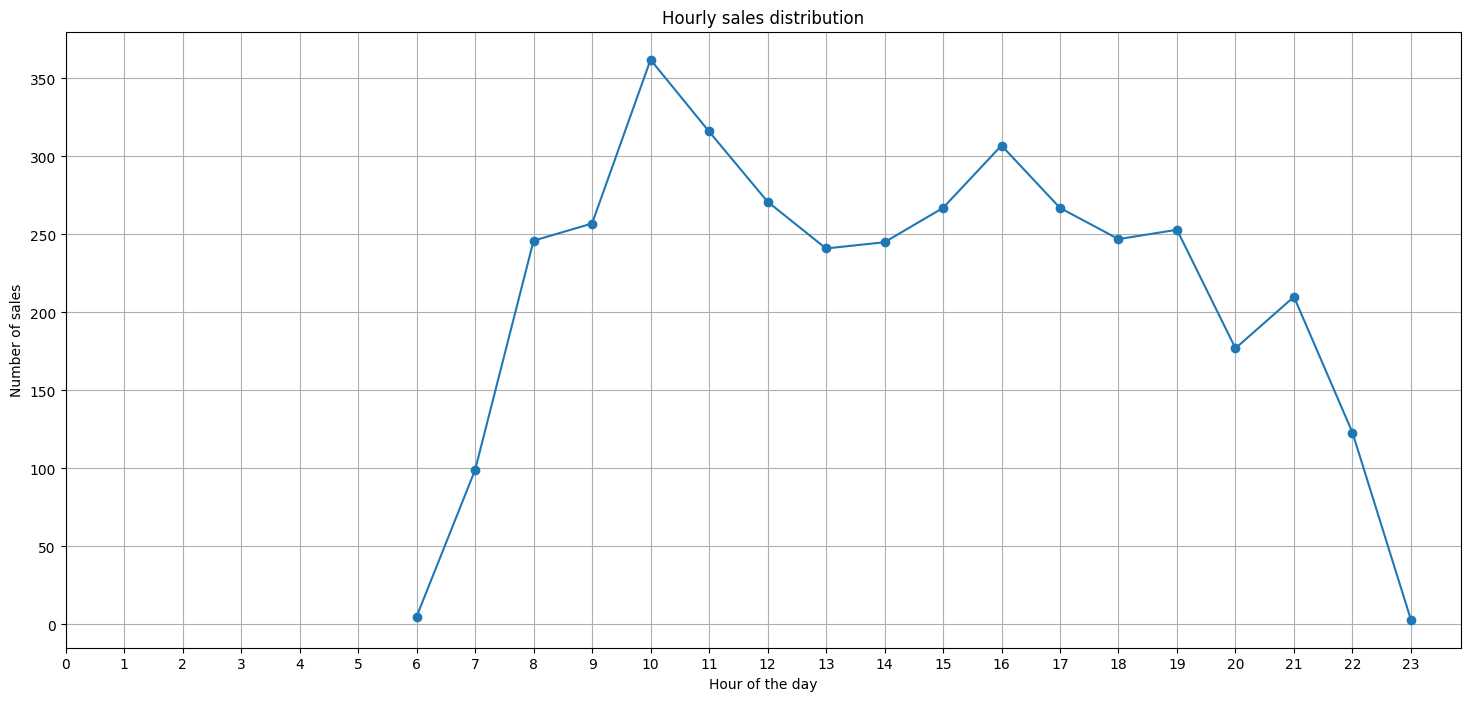

In [114]:
plt.figure(figsize=(18,8))
plt.plot(hourly_sales.index,hourly_sales.values,marker='o')
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of sales')
plt.title('Hourly sales distribution')
plt.grid(True)
plt.show()

In [115]:
weekday_types = df.groupby('day_of_week').size().reset_index(name = 'count')
weekday_types

,day_of_week,count
0,Friday,586
1,Monday,591
2,Saturday,531
3,Sunday,492
4,Thursday,540
5,Tuesday,604
6,Wednesday,552


<ipython-input-116-87fc58c8a915>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weekday_types, y='day_of_week', x='count', palette='pastel')


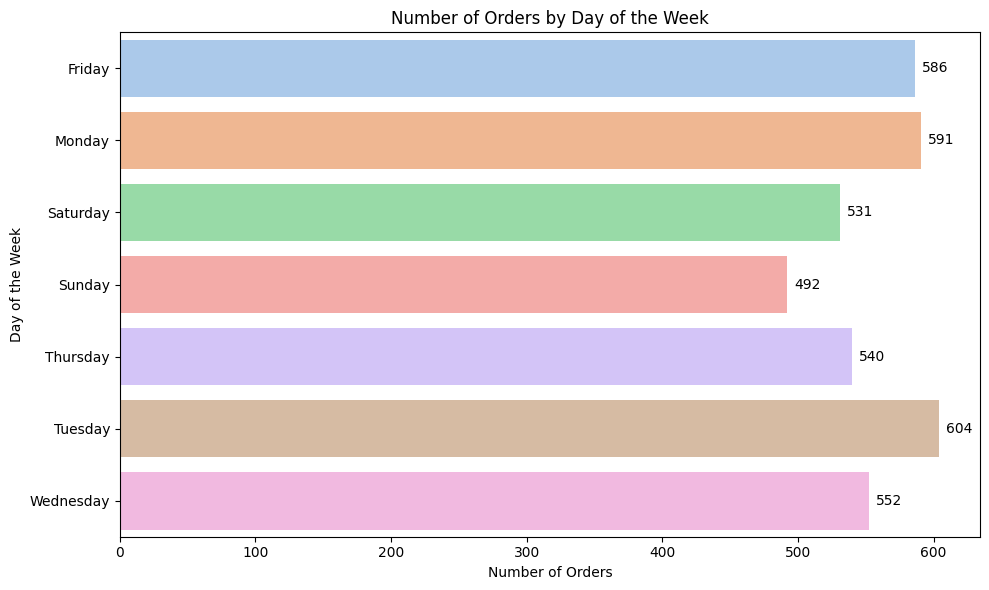

In [116]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=weekday_types, y='day_of_week', x='count', palette='pastel')

plt.title('Number of Orders by Day of the Week')
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [117]:
sales_month=df.groupby(['year', 'month'])['money'].sum().reset_index()
sales_month

,year,month,money
0,2024,3,7050.20
1,2024,4,6720.56
2,2024,5,9063.42
3,2024,6,7758.76
4,2024,7,6915.94
5,2024,8,7613.84
6,2024,9,9988.64
7,2024,10,13891.16
8,2024,11,8590.54
9,2024,12,8237.74


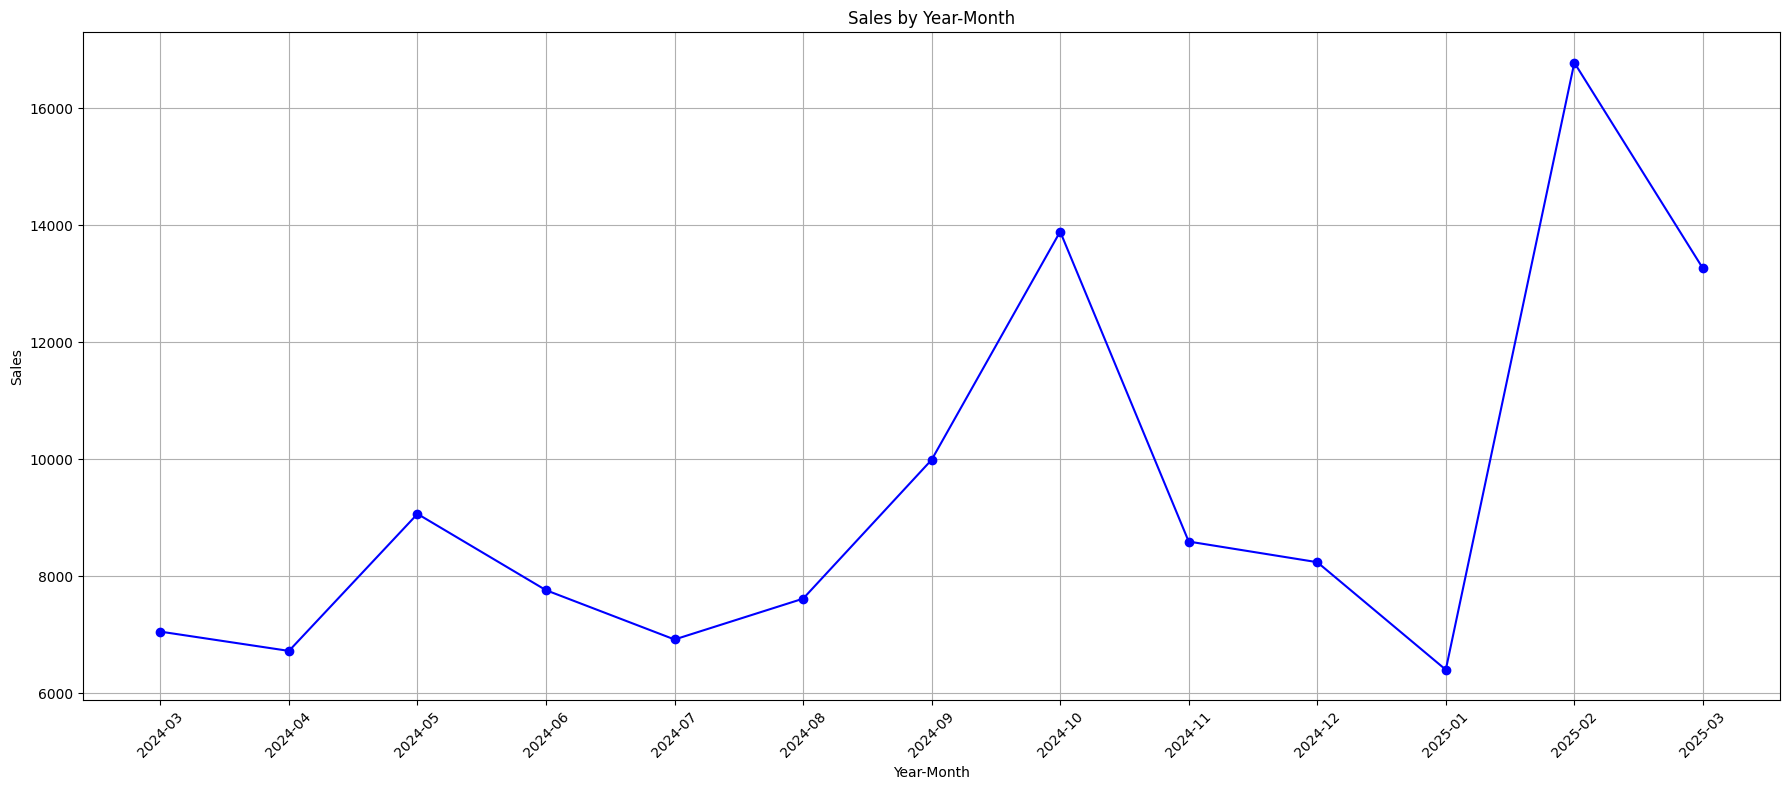

In [118]:
sales_month['year_month'] = sales_month['year'].astype(str) + '-' + sales_month['month'].astype(str).str.zfill(2)

plt.figure(figsize=(18,8))
plt.plot(sales_month['year_month'], sales_month['money'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales by Year-Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
coffee_grouping_df = df.groupby('coffee_name')['money'].sum().reset_index()
coffee_grouping_df = coffee_grouping_df.sort_values(by='money', ascending=False)

# Apply styling for max and min
styled_df = coffee_grouping_df.style.format({
    'money': '${:,.2f}'  # Format as currency with 2 decimal places
}).highlight_max(subset=['money'], color='green').highlight_min(subset=['money'], color='lightcoral')

styled_df

,coffee_name,money
28,Latte,"$28,658.30"
1,Americano with Milk,"$25,269.12"
3,Cappuccino,"$18,514.14"
0,Americano,"$15,437.26"
23,Hot Chocolate,"$10,172.46"
12,Cocoa,"$8,678.16"
15,Cortado,"$7,534.86"
22,Espresso,"$3,187.28"
2,Americano with milk,"$1,050.00"
25,Irish whiskey,$525.00


In [120]:
df.groupby('coffee_name').size().reset_index(name='num_orders').sort_values(by='num_orders', ascending=False).head(10)

,coffee_name,num_orders
1,Americano with Milk,824
28,Latte,806
0,Americano,593
3,Cappuccino,517
15,Cortado,292
23,Hot Chocolate,282
12,Cocoa,243
22,Espresso,152
2,Americano with milk,42
25,Irish whiskey,21


<ipython-input-121-eeb1892078d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_orders, x='coffee_name', y='num_orders', palette='pastel')


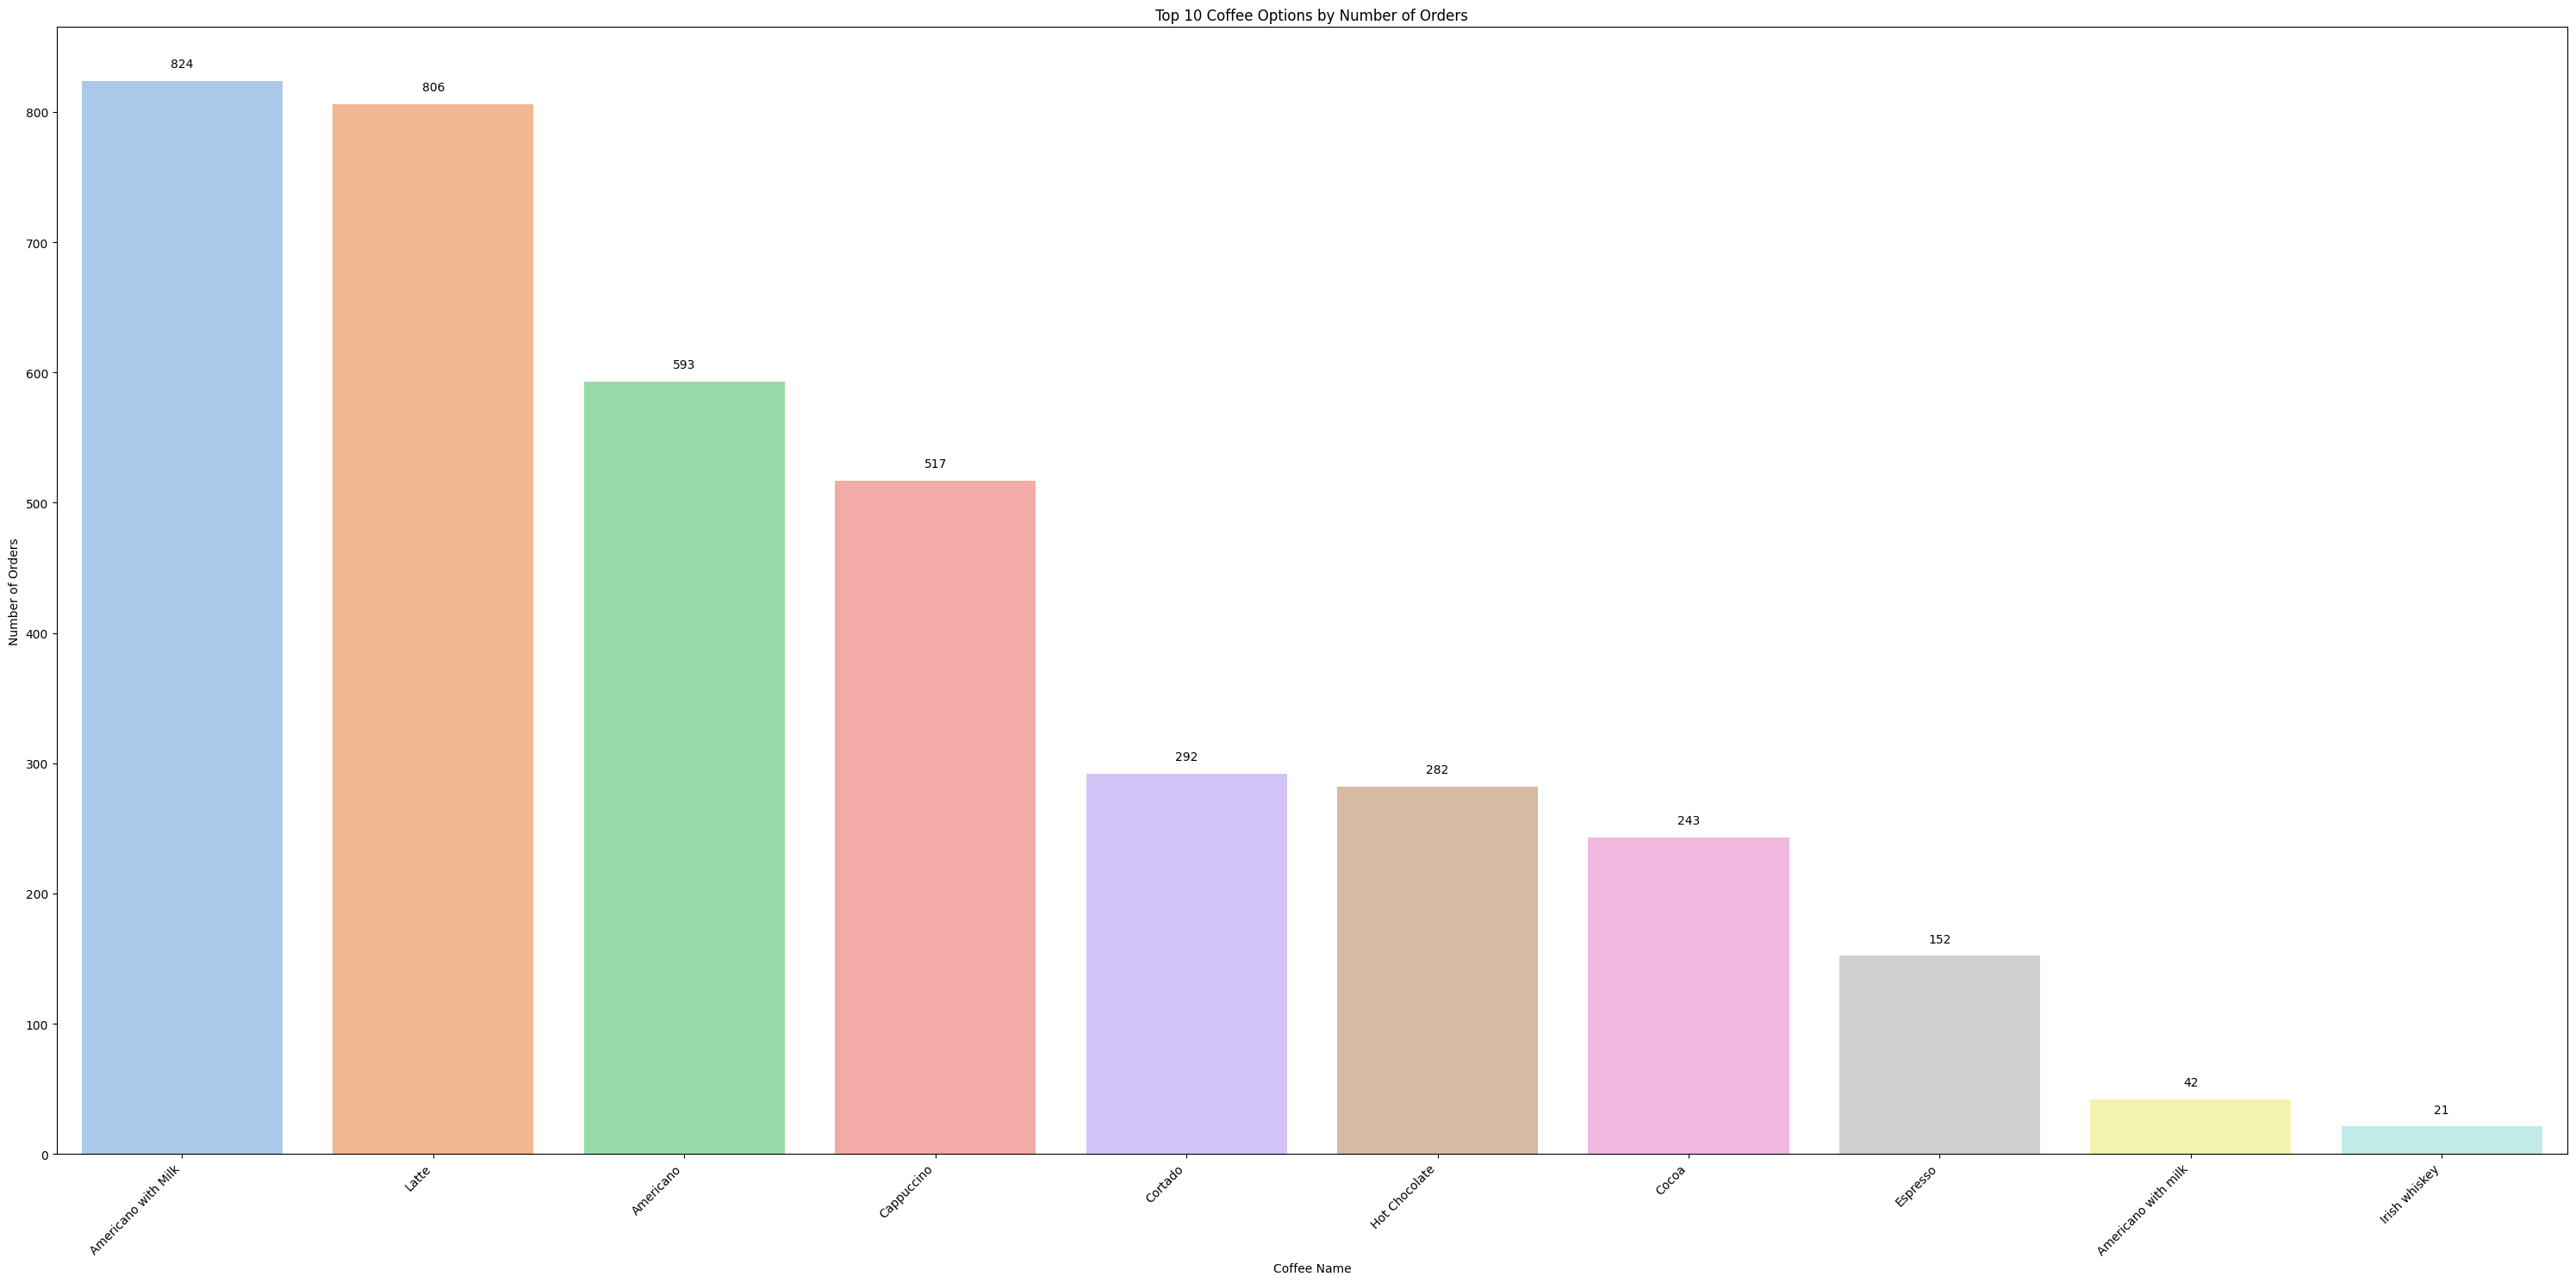

In [121]:
# Top 10 coffee
top10_orders = df.groupby('coffee_name').size().reset_index(name='num_orders').sort_values(by='num_orders', ascending=False).head(10)

# Plot
plt.figure(figsize=(30,15))
ax = sns.barplot(data=top10_orders, x='coffee_name', y='num_orders', palette='pastel')

plt.title('Top 10 Coffee Options by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Coffee Name')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 14), textcoords='offset points')

plt.tight_layout()
plt.show()



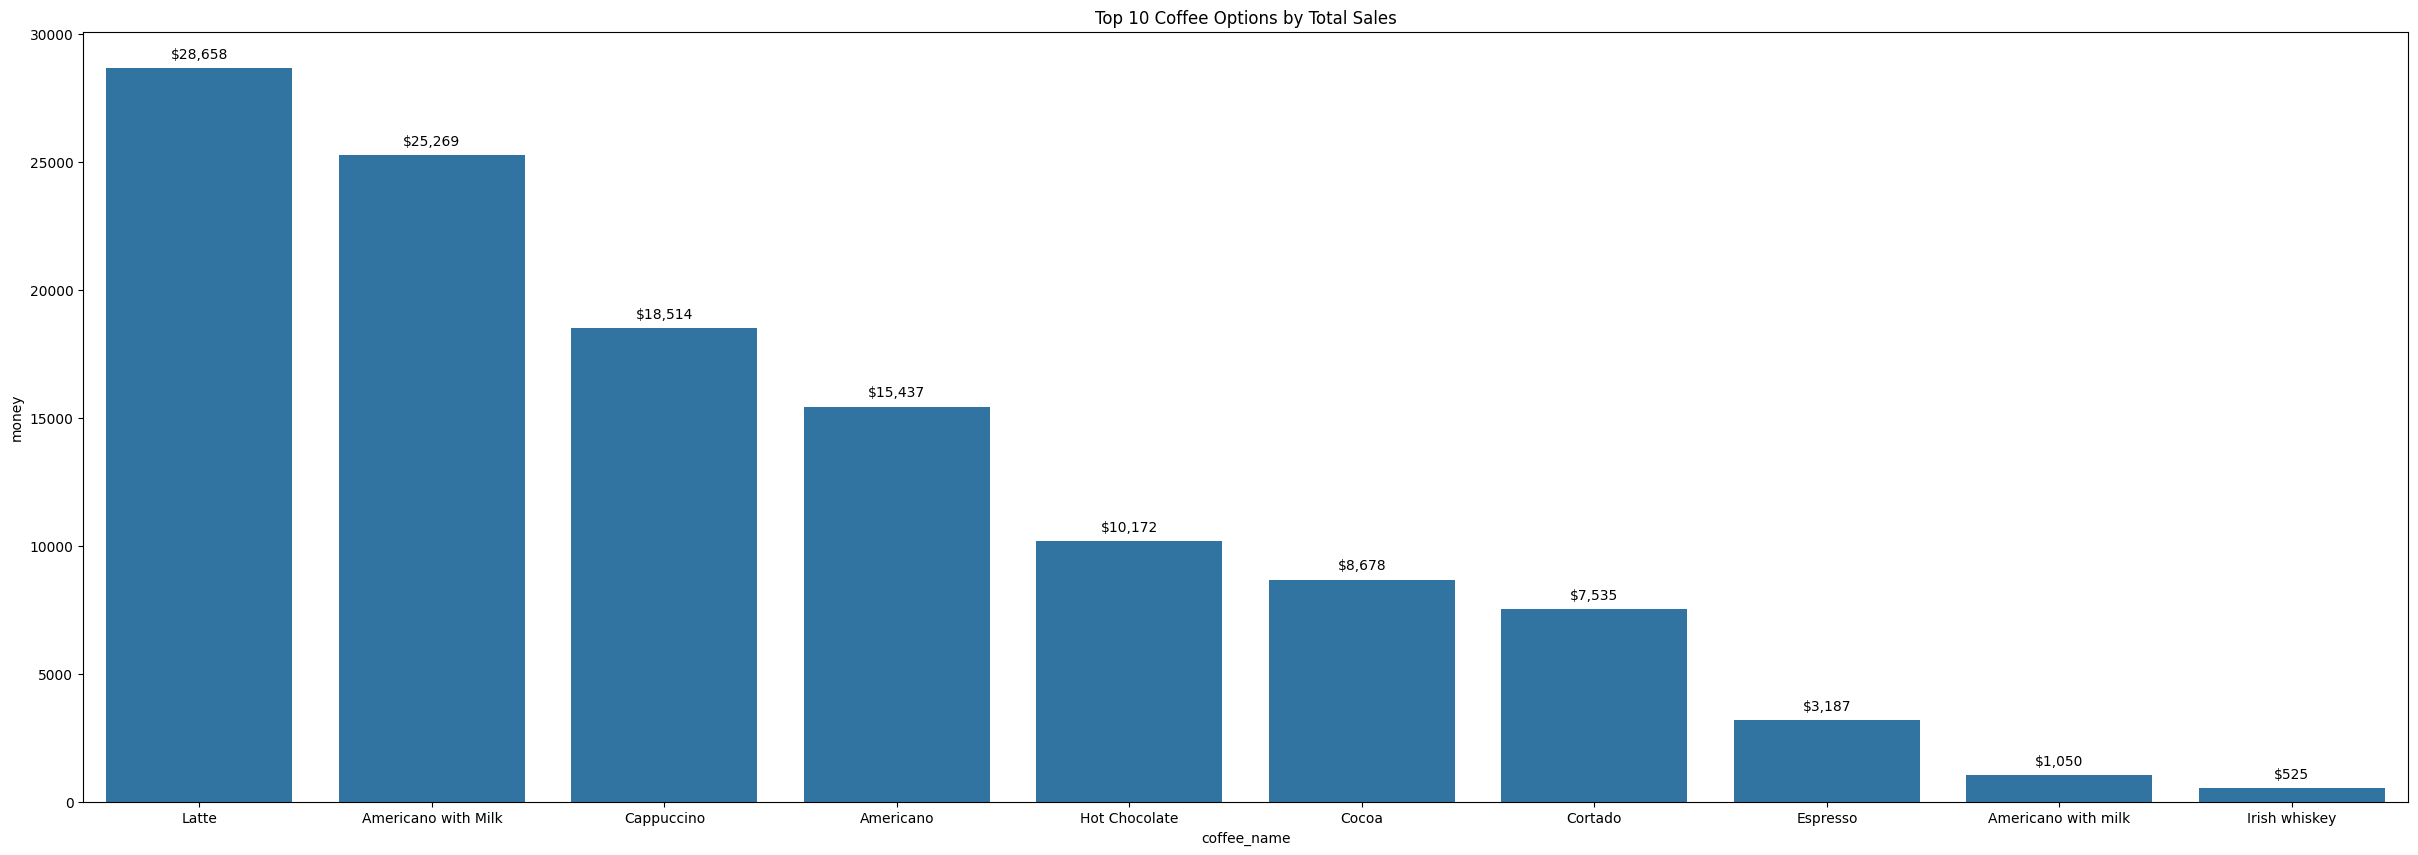

In [122]:
# Create bar chart
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=coffee_grouping_df.nlargest(10, 'money'),
        x='coffee_name',
        y='money')

plt.title('Top 10 Coffee Options by Total Sales')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [123]:
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
monthly_sales = df.groupby(df['datetime'].dt.month)['money'].sum().reset_index()
hourly_sales = df.groupby(df['datetime'].dt.hour)['money'].sum().reset_index()

In [124]:
# Map month numbers to month names
monthly_sales['datetime'] = monthly_sales['datetime'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                               5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                               9: 'September', 10: 'October', 11: 'November', 12: 'December'})

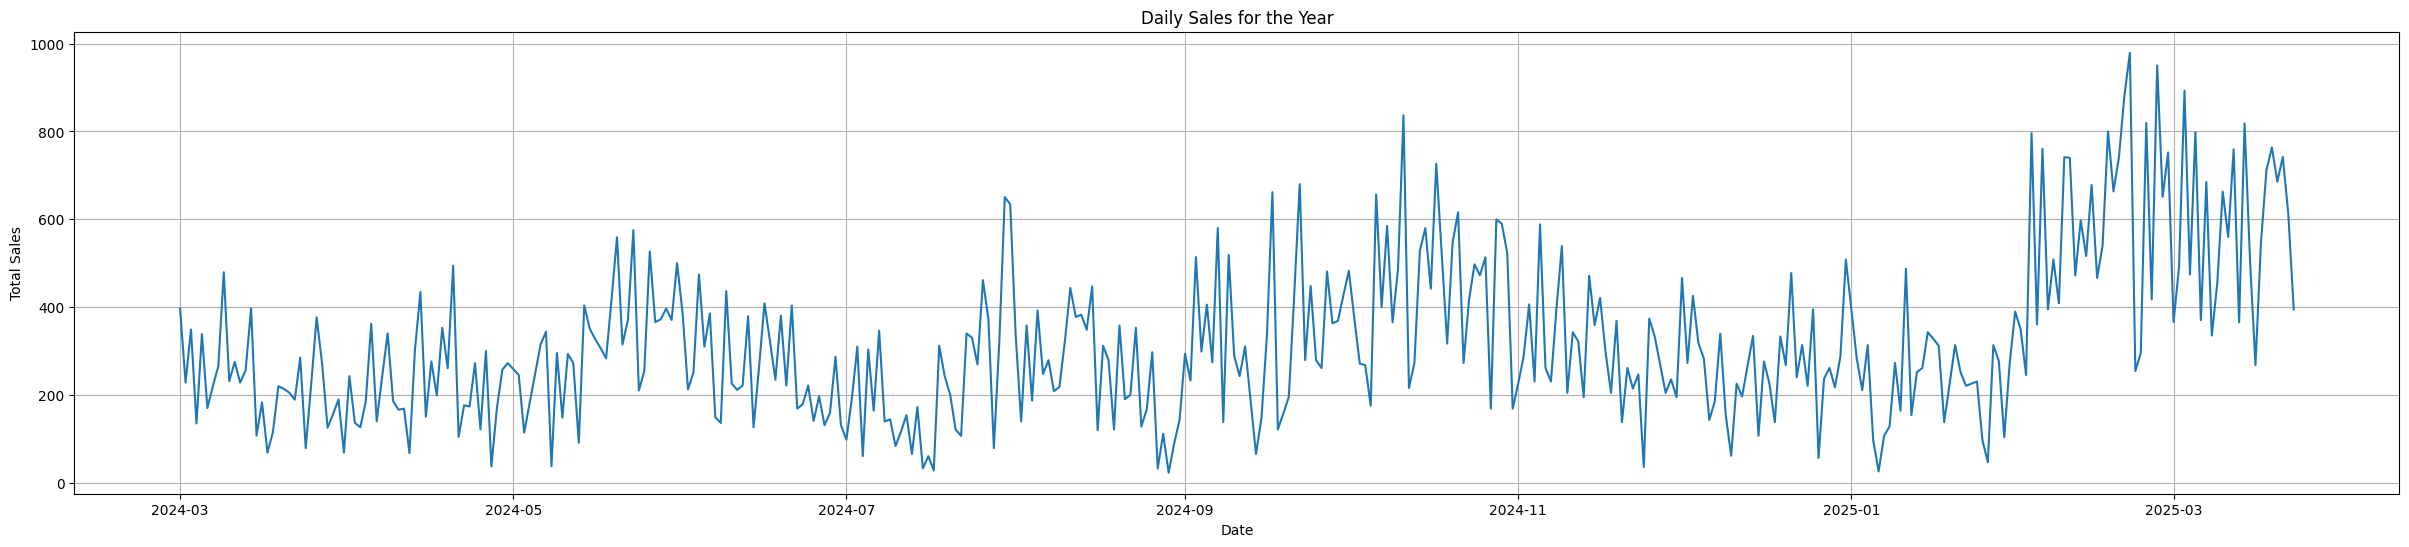

In [125]:
#Plot timeseries, by month, by hour in a day
plt.figure(figsize=(30, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales for the Year')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

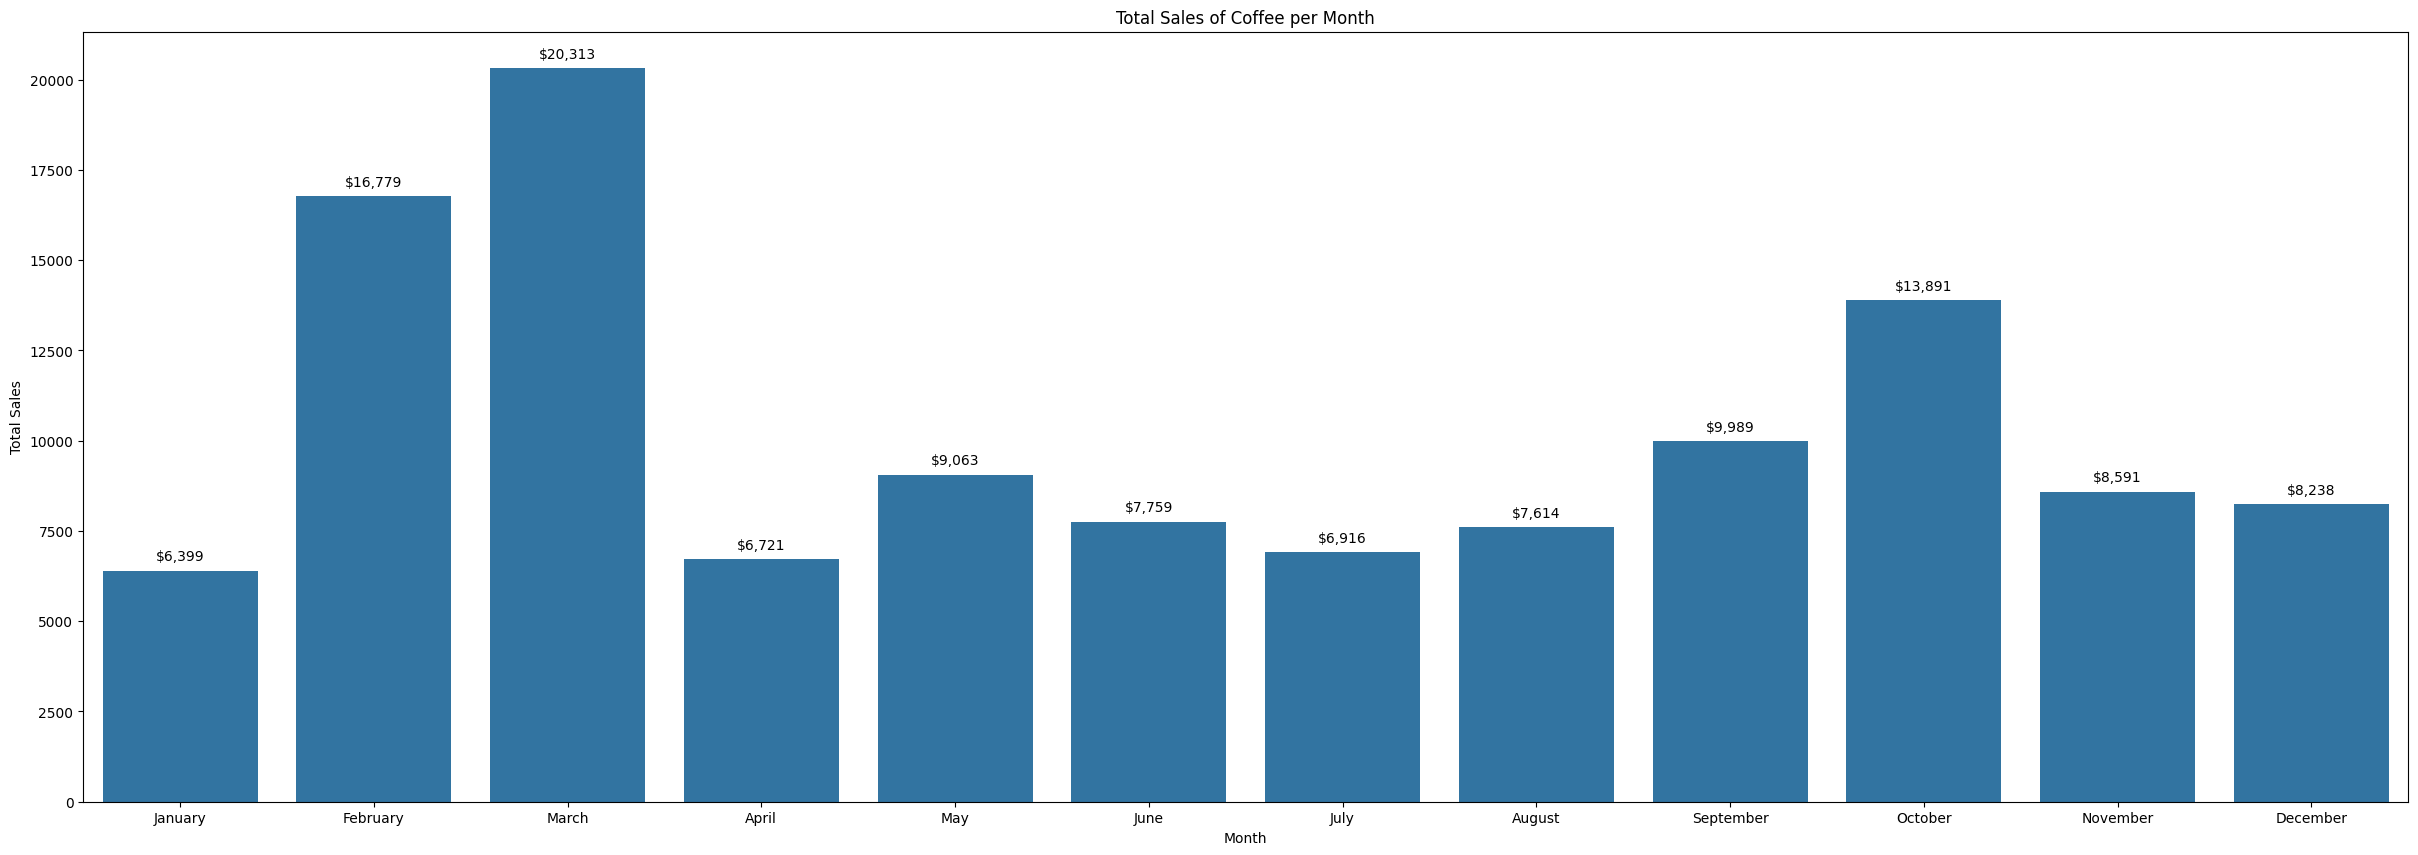

In [126]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=monthly_sales,
        x='datetime',
        y='money')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales of Coffee per Month')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

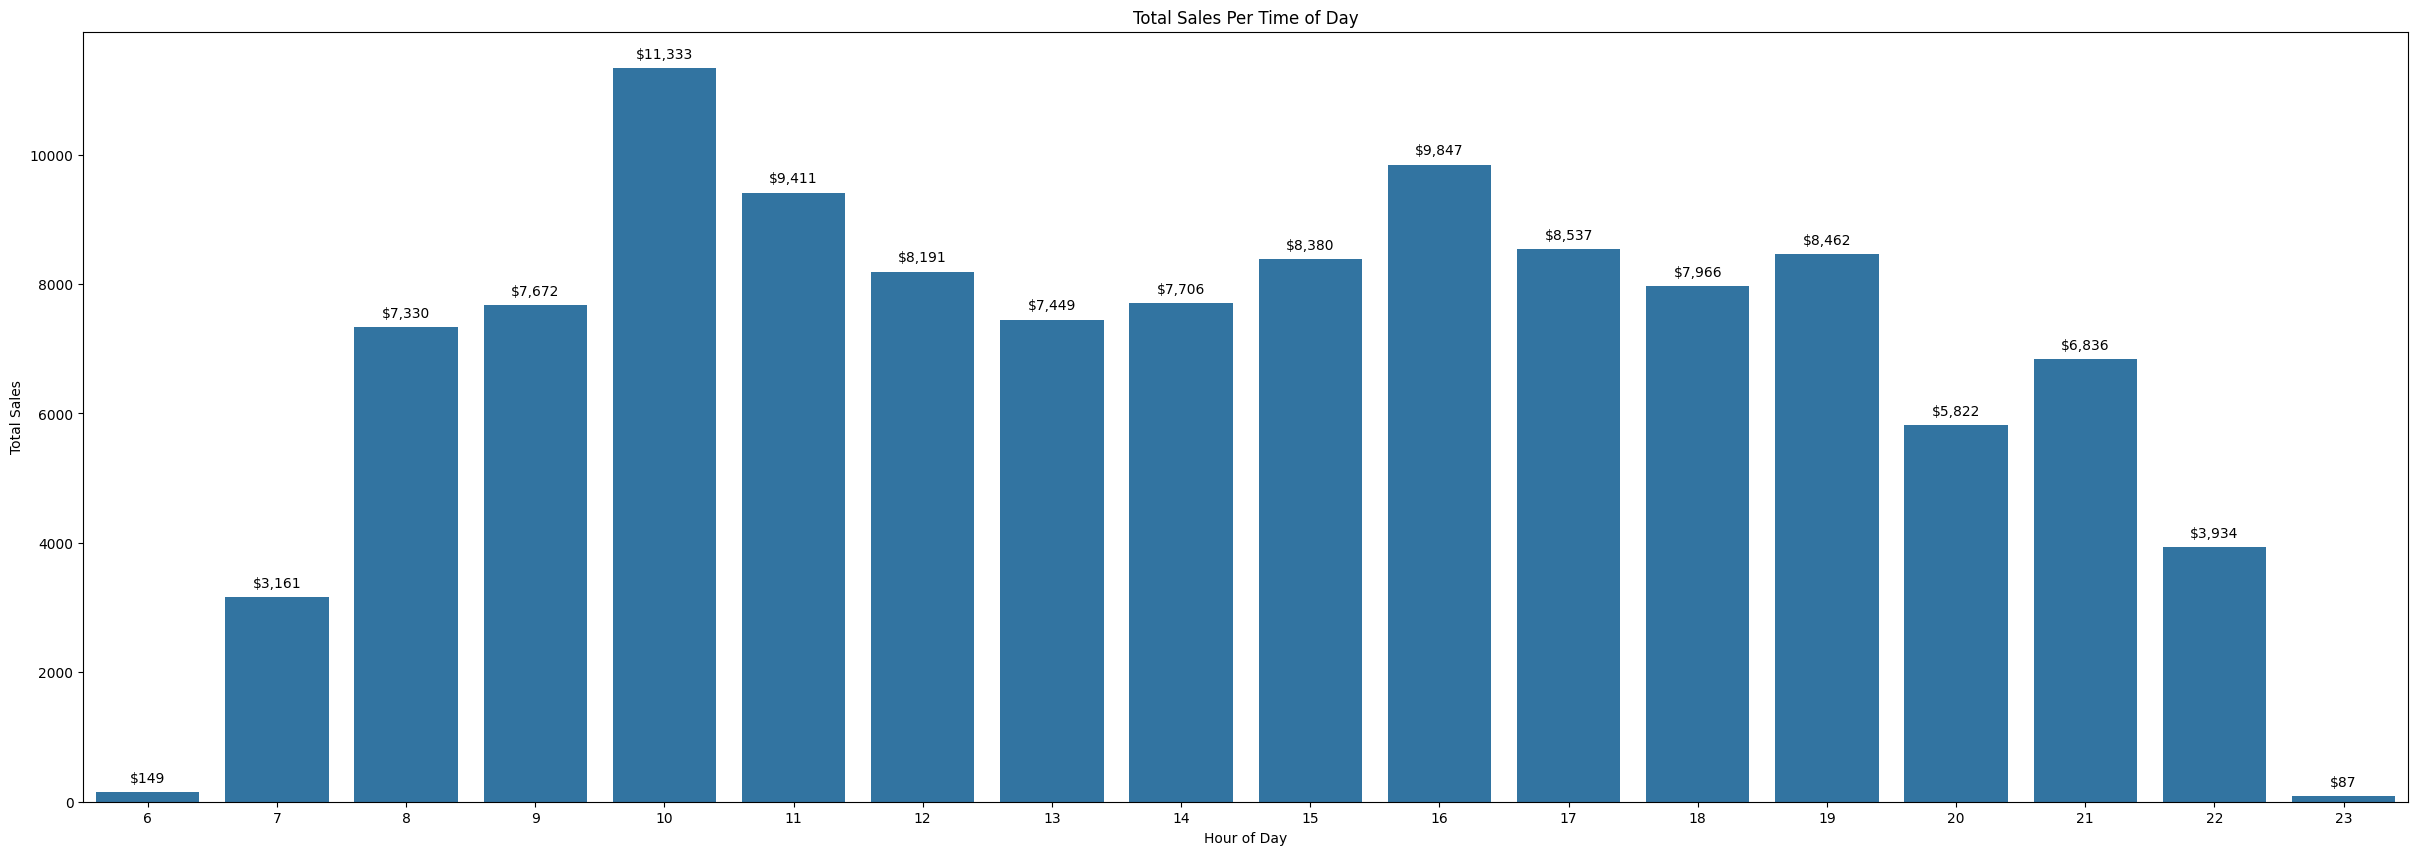

In [127]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=hourly_sales,
        x='datetime',
        y='money')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Time of Day')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()